# Comparison of five network designs

In [81]:
# Import standard libraries
from importlib import reload
import csv
import OmicsIntegrator as oi
import networkx as nx
import community 
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm
import time
from upsetplot import from_contents, UpSet
from sklearn.cluster import AgglomerativeClustering
from IPython.display import Image
from IPython.core.display import SVG
import gseapy
from gseapy.plot import barplot, dotplot
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import random
import itertools

# Import custom libraries
import pcst_utils_6 as pcst
import neighborhoods as nbh

In [242]:
# Reload modules in case of modifications
reload(pcst)
reload(nbh)

<module 'neighborhoods' from '/home/braunger/masterthesis/python_code/PCST/neighborhoods.py'>

In [3]:
# File paths
data_dir = "/home/braunger/masterthesis/data/"
save_dir = "/home/braunger/masterthesis/save/pcst/"
tf_dir = "/home/braunger/masterthesis/save/TF_targets/"
de_dir = "/home/braunger/masterthesis/save/DE_genes/"
fig_dir = "/home/braunger/masterthesis/save/figures/pcst/"

# Design 1

In [4]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 1)
steps = ["1-15_16-26_27-60", "16-26_27-60_61-85", "27-60_61-85_86-96"]
net_stats_d1, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps,
                                                 TFs_with_targets = True, design = 1)

net_stats_d1.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,462,4382,225,95.744681,237,245,47,6
16-26_27-60_61-85,429,3951,204,95.774648,225,241,49,0
27-60_61-85_86-96,465,5070,270,94.405594,195,279,56,4


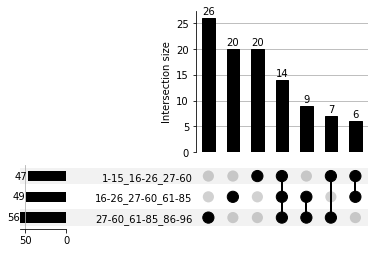

In [5]:
incl_TFs_1 = [[tf[:-4] for tf in net_stats_d1.iloc[net, 9]] for net in range(3)]
shared_TFs_design1 = set.intersection(*map(set,incl_TFs_1))
intersections = from_contents({steps[2]: incl_TFs_1[2], 
                               steps[1]: incl_TFs_1[1],
                               steps[0]: incl_TFs_1[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design1.png')

# Design 2

In [106]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)
net_stats_d2, target_counts_d2 = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 2)

net_stats_d2.iloc[:, 0:8]

TF target cost:  0.01
TF target cost:  0.01
TF target cost:  0.01


,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,529,5320,289,96.333333,240,274,51,6
16-26_27-60_61-85,491,4788,260,96.654275,231,259,59,1
27-60_61-85_86-96,465,5070,270,94.405594,195,279,56,4


In [189]:
pcst.save_net_html(net_dict['200.allTFs.1-15_16-26_27-60'], net_stats_d2.loc['1-15_16-26_27-60', 'incl_TFs'],
                  save_dir, '200.allTFs.1-15_16-26_27-60', '2')
pcst.save_net_html(net_dict['200.allTFs.27-60_61-85_86-96'], net_stats_d2.loc['27-60_61-85_86-96', 'incl_TFs'],
                  save_dir, '200.allTFs.27-60_61-85_86-96', '2')

{'UBE2D2_tr0': 'left',
 'PPP2CA_tr0': 'left',
 'PLK4_tr1': 'right',
 'CTNNB1_tr0': 'left',
 'TRMT112_tr0': 'left',
 'MYH11_tr0': 'middle',
 'PRR11_tr1': 'right',
 'PHF5A_tr0': 'left',
 'SDF2L1_tr1': 'right',
 'EPOR_tr1': 'right',
 'EIF4G2_tr0': 'left',
 'RNF126_tr1': 'right',
 'NSMCE4A_tr0': 'left',
 'UBE2S_tr1': 'right',
 'TGFBR1_tr0': 'left',
 'SGCE_tr0': 'left',
 'TTK_tr1': 'right',
 'BRD2_tr0': 'middle',
 'FBLIM1_tr0': 'left',
 'SHC1_tr0': 'left',
 'ESM1_tr0': 'left',
 'NPM1_tr0': 'left',
 'RAMP1_tr0': 'left',
 'NUP98_tr0': 'left',
 'CKAP2_tr1': 'right',
 'GABPA_tr0': 'middle',
 'TRPC1_tr0': 'left',
 'STIP1_tr0': 'left',
 'SLC2A6_tr1': 'right',
 'CD302_tr1': 'right',
 'GINS4_tr1': 'right',
 'ANGPTL4_tr0': 'left',
 'ADGRV1_tr0': 'left',
 'TRAF6_tr0': 'left',
 'FAM83D_tr1': 'right',
 'MAP3K5_tr0': 'left',
 'APAF1_tr0': 'left',
 'MAGED4_tr0': 'left',
 'EXOC6_tr0': 'left',
 'FAM133B_tr0': 'left',
 'GNB1_tr0': 'left',
 'NSMCE3_tr0': 'left',
 'C7orf50_tr1': 'right',
 'SLC9A9_tr1': 'right

/home/braunger/miniconda3/envs/pcst/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  del sys.path[0]


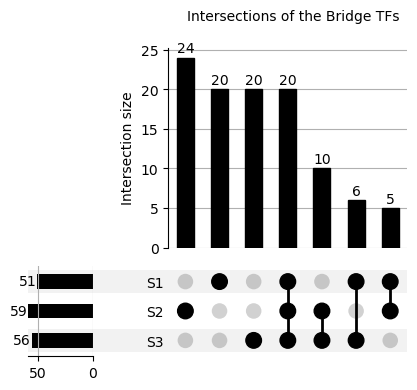

In [183]:
incl_TFs_2 = [[tf[:-4] for tf in net_stats_d2.iloc[net, 9]] for net in range(3)]
shared_TFs_design2 = set.intersection(*map(set,incl_TFs_2))
intersections = from_contents({'S3': incl_TFs_2[2], 
                               'S2': incl_TFs_2[1],
                               'S1': incl_TFs_2[0]})
intersections['S1'] = intersections.index.get_level_values(0)
intersections['S2'] = intersections.index.get_level_values(1)
intersections['S3'] = intersections.index.get_level_values(2)
intersections['group'] = intersections['S1'].astype(str)+'_'+intersections['S2'].astype(str)+'_'+intersections['S3'].astype(str)

intersections['group'] = intersections['group'].astype('category')
intersections['group'].cat.reorder_categories(['False_True_False', 'False_False_True', 'True_False_False', 'True_True_True',
                      'True_True_False', 'True_False_True', 'False_True_True'], inplace=True)
intersections = intersections.sort_values(by = 'group')

matplotlib.rc_file_defaults()
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by=None, min_subset_size = 2, sort_categories_by=None).plot()
plt.figtext(0.45, 0.95, 'Intersections of the Bridge TFs')
plt.savefig(fig_dir+'intersections_design2.png', dpi = 500, bbox_inches="tight")

In [8]:
# save incl TFs as dataframe
incl_TFs_df = pd.DataFrame({'TF': list(itertools.chain(*incl_TFs_2)), 
                            'net': list(itertools.chain(*[['young_net'] * len(incl_TFs_2[0]), 
                                                          ['middle_net'] * len(incl_TFs_2[1]), 
                                                          ['old_net'] * len(incl_TFs_2[2])]))})
incl_TFs_df.to_csv(save_dir + 'incl_TFs_design2.csv', index = False)

# Design 3

In [9]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 3)
net_stats_d3, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 3)

net_stats_d3.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,533,5761,294,97.674419,239,274,50,6
16-26_27-60_61-85,495,5444,263,98.134328,232,259,60,1
27-60_61-85_86-96,470,5662,276,96.503497,194,279,55,4


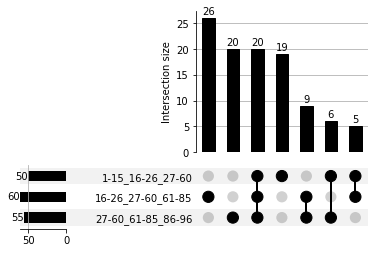

In [10]:
incl_TFs_3 = [[tf[:-4] for tf in net_stats_d3.iloc[net, 9]] for net in range(3)]
shared_TFs_design3 = set.intersection(*map(set,incl_TFs_3))
intersections = from_contents({steps[2]: incl_TFs_3[2], 
                               steps[1]: incl_TFs_3[1],
                               steps[0]: incl_TFs_3[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design3.png')

# Design 4

In [11]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 4)
net_stats_d4, target_counts_d4 = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 4)

net_stats_d4.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,565,6456,309,98.722045,256,303,55,6
16-26_27-60_61-85,514,5846,261,97.388060,253,287,74,1
27-60_61-85_86-96,470,5662,276,96.503497,194,279,55,4


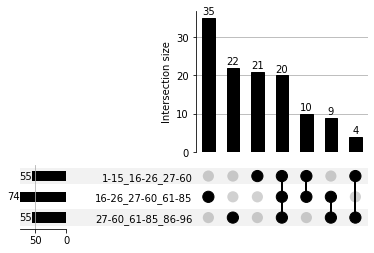

In [12]:
incl_TFs_4 = [[tf[:-4] for tf in net_stats_d4.iloc[net, 9]] for net in range(3)]
shared_TFs_design4 = set.intersection(*map(set,incl_TFs_4))
intersections = from_contents({steps[2]: incl_TFs_4[2], 
                               steps[1]: incl_TFs_4[1],
                               steps[0]: incl_TFs_4[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design4.png')

# Design 5

In [13]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 5)
net_stats_d5, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 5)

net_stats_d5.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,740,11573,494,102.277433,246,305,58,6
16-26_27-60_61-85,666,10414,418,103.209877,248,287,78,1
27-60_61-85_86-96,470,5662,276,96.503497,194,279,55,4


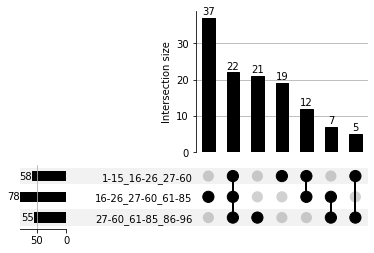

In [14]:
incl_TFs_5 = [[tf[:-4] for tf in net_stats_d5.iloc[net, 9]] for net in range(3)]
shared_TFs_design5 = set.intersection(*map(set,incl_TFs_5))
intersections = from_contents({steps[2]: incl_TFs_5[2], 
                               steps[1]: incl_TFs_5[1],
                               steps[0]: incl_TFs_5[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design5.png')

# Comparison of the five designs

## TFs shared between all networks

In [15]:
# Numbers of TFs per design
pd.concat([net_stats_d1['n_incl_TFs'].rename("design_1"), 
          net_stats_d2['n_incl_TFs'].rename("design_2"), 
          net_stats_d3['n_incl_TFs'].rename("design_3"),
          net_stats_d4['n_incl_TFs'].rename("design_4"),
          net_stats_d5['n_incl_TFs'].rename("design_5")], axis = 1)

,design_1,design_2,design_3,design_4,design_5
1-15_16-26_27-60,47,51,50,55,58
16-26_27-60_61-85,49,59,60,74,78
27-60_61-85_86-96,56,56,55,55,55


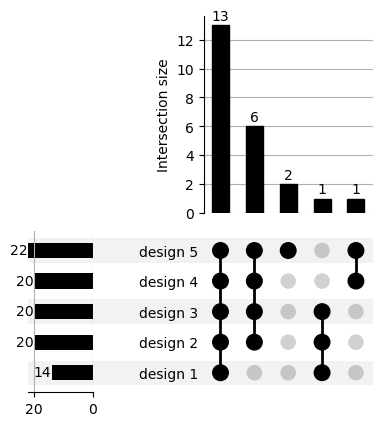

In [85]:
# How strongly do the TFs that occur in all 3 networks overlap?
intersections = from_contents({'design 1': shared_TFs_design1, 
                               'design 2': shared_TFs_design2,
                               'design 3': shared_TFs_design3,
                               'design 4': shared_TFs_design4,
                               'design 5': shared_TFs_design5})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_all-designs.png', dpi = 500, bbox_inches="tight")

In [17]:
set.intersection(shared_TFs_design1, 
                 shared_TFs_design2,
                 shared_TFs_design3,
                 shared_TFs_design4, 
                 shared_TFs_design5)

{'AHR',
 'ATF1',
 'FOXO3',
 'GTF2B',
 'HDAC1',
 'HIF1A',
 'MAZ',
 'NOTCH1',
 'NR2C2',
 'POLR2A',
 'SRC',
 'STAT1',
 'ZNF384'}

In [18]:
shared_TFs_design2

{'AHR',
 'ATF1',
 'FLI1',
 'FOXO3',
 'GATA2',
 'GTF2B',
 'HDAC1',
 'HIF1A',
 'HOXA6',
 'KLF3',
 'MAZ',
 'NCOR1',
 'NOTCH1',
 'NR2C2',
 'POLR2A',
 'SRC',
 'STAT1',
 'STAT3',
 'TCF7L2',
 'ZNF384'}

## Young-specific TFs

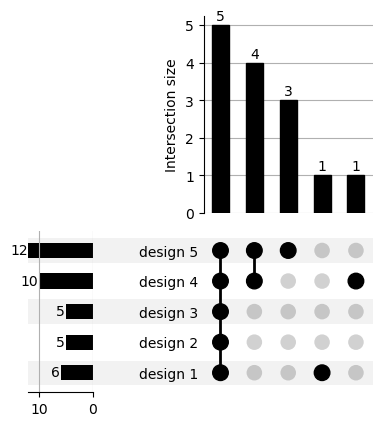

In [86]:
def young_specific_TFs(incl_TFs):
    return set.intersection(*map(set, incl_TFs[:2])).difference(set(incl_TFs[2]))

intersections = from_contents({'design 1': young_specific_TFs(incl_TFs_1), 
                               'design 2': young_specific_TFs(incl_TFs_2),
                               'design 3': young_specific_TFs(incl_TFs_3),
                               'design 4': young_specific_TFs(incl_TFs_4),
                               'design 5': young_specific_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'young_specific_TFs.png', dpi = 500, bbox_inches="tight")

In [20]:
set.intersection(young_specific_TFs(incl_TFs_1), 
                 young_specific_TFs(incl_TFs_2),
                 young_specific_TFs(incl_TFs_3),
                 young_specific_TFs(incl_TFs_4), 
                 young_specific_TFs(incl_TFs_5))

{'BRCA1', 'CREBBP', 'ERG', 'LYL1', 'SMAD3'}

## Old-specific TFs

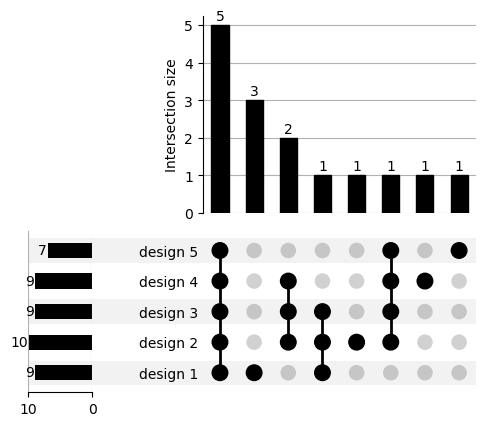

In [87]:
def old_specific_TFs(incl_TFs):
    return set.intersection(*map(set, incl_TFs[1:3])).difference(set(incl_TFs[0]))

intersections = from_contents({'design 1': old_specific_TFs(incl_TFs_1), 
                               'design 2': old_specific_TFs(incl_TFs_2),
                               'design 3': old_specific_TFs(incl_TFs_3),
                               'design 4': old_specific_TFs(incl_TFs_4),
                               'design 5': old_specific_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'old_specific_TFs.png', dpi = 500, bbox_inches="tight")

In [22]:
set.intersection(old_specific_TFs(incl_TFs_1), 
                 old_specific_TFs(incl_TFs_2),
                 old_specific_TFs(incl_TFs_3),
                 old_specific_TFs(incl_TFs_4), 
                 old_specific_TFs(incl_TFs_5))

{'CTCF', 'GABPA', 'MAFF', 'RBBP5', 'SIX5'}

## TFs in the first network

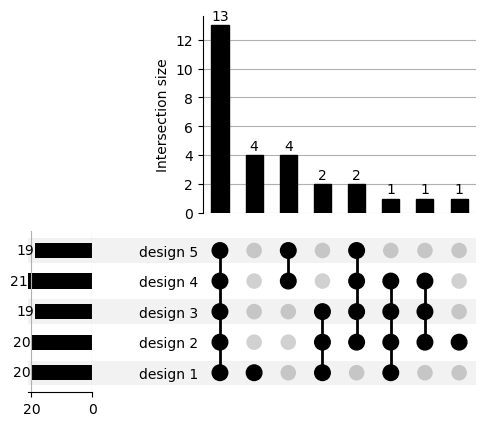

In [88]:
def first_net_TFs(incl_TFs):
    return set(incl_TFs[0]).difference(set.union(*map(set,[incl_TFs[i] for i in [1, 2]])))

intersections = from_contents({'design 1': first_net_TFs(incl_TFs_1), 
                               'design 2': first_net_TFs(incl_TFs_2),
                               'design 3': first_net_TFs(incl_TFs_3),
                               'design 4': first_net_TFs(incl_TFs_4),
                               'design 5': first_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'first_net_TFs.png', dpi = 500, bbox_inches="tight")

In [24]:
set.intersection(first_net_TFs(incl_TFs_1), 
                 first_net_TFs(incl_TFs_2),
                 first_net_TFs(incl_TFs_3),
                 first_net_TFs(incl_TFs_4), 
                 first_net_TFs(incl_TFs_5))

{'CDK7',
 'CTNNB1',
 'EP300',
 'GLI2',
 'HOXA13',
 'MAX',
 'MEIS1',
 'MYBL2',
 'NR5A2',
 'RNF2',
 'SIN3A',
 'TEAD4',
 'TFAP2C'}

## TFs in the second network

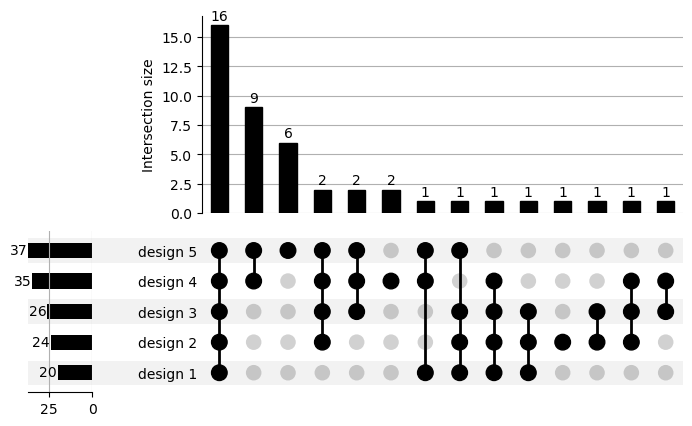

In [89]:
def second_net_TFs(incl_TFs):
    return set(incl_TFs[1]).difference(set.union(*map(set,[incl_TFs[i] for i in [0, 2]])))

intersections = from_contents({'design 1': second_net_TFs(incl_TFs_1), 
                               'design 2': second_net_TFs(incl_TFs_2),
                               'design 3': second_net_TFs(incl_TFs_3),
                               'design 4': second_net_TFs(incl_TFs_4),
                               'design 5': second_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'second_net_TFs.png', dpi = 500, bbox_inches="tight")

In [26]:
set.intersection(second_net_TFs(incl_TFs_1), 
                 second_net_TFs(incl_TFs_2),
                 second_net_TFs(incl_TFs_3),
                 second_net_TFs(incl_TFs_4), 
                 second_net_TFs(incl_TFs_5))

{'ATF3',
 'CHD4',
 'E2F4',
 'ELK3',
 'ETV1',
 'MECOM',
 'RXRA',
 'SP1',
 'VEZF1',
 'WDR5',
 'YY1',
 'ZBTB33',
 'ZEB1',
 'ZFX',
 'ZNF76',
 'ZNF83'}

## TFs in the last network

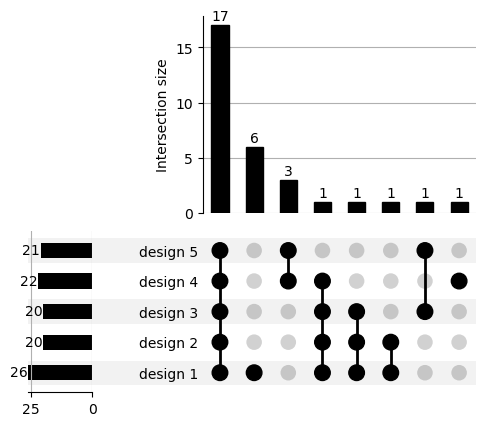

In [90]:
def last_net_TFs(incl_TFs):
    return set(incl_TFs[2]).difference(set.union(*map(set,incl_TFs[0:2])))

intersections = from_contents({'design 1': last_net_TFs(incl_TFs_1), 
                               'design 2': last_net_TFs(incl_TFs_2),
                               'design 3': last_net_TFs(incl_TFs_3),
                               'design 4': last_net_TFs(incl_TFs_4),
                               'design 5': last_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'last_net_TFs.png', dpi = 500, bbox_inches="tight")

In [28]:
set.intersection(last_net_TFs(incl_TFs_1), 
                 last_net_TFs(incl_TFs_2),
                 last_net_TFs(incl_TFs_3),
                 last_net_TFs(incl_TFs_4), 
                 last_net_TFs(incl_TFs_5))

{'ARNT',
 'BMI1',
 'BRD2',
 'CDK9',
 'CLOCK',
 'DDX5',
 'E2F1',
 'FOS',
 'GLIS1',
 'KDM1A',
 'MYH11',
 'NR3C1',
 'ORC1',
 'SMAD2',
 'TAF3',
 'THAP11',
 'TRIM24'}

## Save DE targets of network-specific TFs

In [29]:
specific_TFs_targets = pd.DataFrame({'TF': list(shared_TFs_design2) + 
                                           list(first_net_TFs(incl_TFs_2)) + 
                                           list(second_net_TFs(incl_TFs_2)) + 
                                           list(last_net_TFs(incl_TFs_2)),
                                     'net': ['shared'] *len(shared_TFs_design2) + 
                                            ['young_net'] * len(first_net_TFs(incl_TFs_2)) + 
                                            ['middle_net'] * len(second_net_TFs(incl_TFs_2)) + 
                                            ['old_net'] * len(last_net_TFs(incl_TFs_2))})

# add target genes of TFs
tf_targets = pd.read_csv(data_dir + 'tf_data/tf-target-information.txt', sep = '\t')
tf_targets = tf_targets[['TF', 'target']].drop_duplicates()
specific_TFs_targets = specific_TFs_targets.merge(tf_targets)

# add information about whether targets are differentially expressed
de_genes = pd.read_csv(data_dir+'de_data/DE_var_p_n_200.csv')
specific_TFs_targets['DE_gene'] = False
specific_TFs_targets.loc[(specific_TFs_targets['net'] == 'shared') & 
                          (specific_TFs_targets['target'].isin(de_genes.loc[de_genes['transition'].isin(['fc_16-26_27-60', 'fc_27-60_61-85', 'fc_61-85_86-96']), 'gene'])), 'DE_gene'] = True
specific_TFs_targets.loc[(specific_TFs_targets['net'] == 'young_net') & 
                          (specific_TFs_targets['target'].isin(de_genes.loc[de_genes['transition'] == 'fc_16-26_27-60', 'gene'])), 'DE_gene'] = True
specific_TFs_targets.loc[(specific_TFs_targets['net'] == 'middle_net') & 
                          (specific_TFs_targets['target'].isin(de_genes.loc[de_genes['transition'] == 'fc_27-60_61-85', 'gene'])), 'DE_gene'] = True
specific_TFs_targets.loc[(specific_TFs_targets['net'] == 'old_net') & 
                          (specific_TFs_targets['target'].isin(de_genes.loc[de_genes['transition'] == 'fc_61-85_86-96', 'gene'])), 'DE_gene'] = True
print(specific_TFs_targets.head())

# save results
specific_TFs_targets.to_csv(save_dir + 'specific_TFs_targets.csv', index = False) 

      TF     net      target  DE_gene
0  HOXA6  shared    C22orf39    False
1  HOXA6  shared  AC000068.5    False
2  HOXA6  shared       UFD1L    False
3  HOXA6  shared       CDC45     True
4  HOXA6  shared      KLHL22    False


## Bipartite graph of TFs and targets

In [30]:
DE_targets = specific_TFs_targets[specific_TFs_targets['DE_gene'] == True]
selection = DE_targets[DE_targets['net'] == 'young_net']

# node attributes for TFs and targets
network = nx.from_pandas_edgelist(selection, 'TF', 'target')
anno_dict = {}
for target in selection['target'].unique():
    anno_dict[target] = 'targets'
for TF in selection['TF'].unique():
    anno_dict[TF] = 'TFs'
nx.set_node_attributes(network, anno_dict, name='TF-targets')

# normalized degree per node
degrees = {}
for TF in anno_dict.keys():
    targets_total = specific_TFs_targets[specific_TFs_targets['TF'] == TF]
    if targets_total.shape[0] == 0: 
        continue
    DE_targets = targets_total[targets_total['DE_gene'] == True]
    DE_targets = DE_targets[DE_targets['net'] == 'young_net']
    if DE_targets.shape[0] == 0: 
        continue
    degrees[TF] = DE_targets.shape[0] / targets_total.shape[0] * 100
nx.set_node_attributes(network, degrees, name='percentage DE targets')

# save resulting network
oi.output_networkx_graph_as_interactive_html(network, filename=save_dir + "TF_targets_young.html")

PosixPath('/home/braunger/masterthesis/save/pcst/TF_targets_young.html')

In [31]:
# for shared TFs
DE_targets = specific_TFs_targets[specific_TFs_targets['DE_gene'] == True]
selection = DE_targets[DE_targets['net'] == 'shared']

# save network with node attributes for TFs and targets
network = nx.from_pandas_edgelist(selection, 'TF', 'target')
anno_dict = {}
for target in selection['target'].unique():
    if target in list(de_genes.loc[de_genes['transition'] == 'fc_16-26_27-60', 'gene']):
        anno_dict[target] = 'young DE'
    if target in list(de_genes.loc[de_genes['transition'] == 'fc_27-60_61-85', 'gene']):
        anno_dict[target] = 'middle DE'
    if target in list(de_genes.loc[de_genes['transition'] == 'fc_61-85_86-96', 'gene']):
        anno_dict[target] = 'old DE'
    
for TF in selection['TF'].unique():
    anno_dict[TF] = 'TFs'
    
nx.set_node_attributes(network, anno_dict, name='TF-targets')
degrees = dict(network.degree())
nx.set_node_attributes(network, degrees, name='degrees')
oi.output_networkx_graph_as_interactive_html(network, filename=save_dir + "TF_targets_shared.html")

PosixPath('/home/braunger/masterthesis/save/pcst/TF_targets_shared.html')

In [32]:
# for shared TFs
DE_targets = specific_TFs_targets[specific_TFs_targets['DE_gene'] == True]
selection = DE_targets[DE_targets['net'] == 'shared']

net_df = pd.DataFrame()
for TF in selection['TF'].unique():
    targets = selection.loc[selection['TF'] == TF, 'target']
    target1, target2 = zip(*itertools.combinations(targets, 2))
    net_df = pd.concat([net_df, pd.DataFrame({'target1': target1, 
                                              'target2': target2, 
                                              'weight': 1 / targets.shape[0]})])
net_df = net_df.drop_duplicates()

# save network with node attributes for TFs and targets
network = nx.from_pandas_edgelist(net_df, 'target1', 'target2', 'weight')
anno_dict = {}
for target in selection['target'].unique():
    if target in list(de_genes.loc[de_genes['transition'] == 'fc_16-26_27-60', 'gene']):
        anno_dict[target] = 'young DE'
    if target in list(de_genes.loc[de_genes['transition'] == 'fc_27-60_61-85', 'gene']):
        anno_dict[target] = 'middle DE'
    if target in list(de_genes.loc[de_genes['transition'] == 'fc_61-85_86-96', 'gene']):
        anno_dict[target] = 'old DE'

nx.set_node_attributes(network, anno_dict, name='target-groups')
clusters = community.best_partition(network, weight = 'weight')
clusters = dict([key, str(value)] for key, value in clusters.items()) 
nx.set_node_attributes(network, clusters, name='clustering')
oi.output_networkx_graph_as_interactive_html(network, filename=save_dir + "targets_shared_TFs.html")

PosixPath('/home/braunger/masterthesis/save/pcst/targets_shared_TFs.html')

In [33]:
# weight edges anti-proportional to number of targets a TF has
# if thats not enough, exclude TFs that target nearly everything
# create network with blue edges for young TFs and red edges for old TFs

## TF redundancy

In [98]:
print('Network density for TFs targeting others of their group')
print('Shared TFs', pcst.TF_redundancy(list(shared_TFs_design2), 'shared_TFs', data_dir, save_dir))
print('First net TFs', pcst.TF_redundancy(list(first_net_TFs(incl_TFs_2)), 'first_net_TFs', data_dir, save_dir))
print('Middle net TFs', pcst.TF_redundancy(list(second_net_TFs(incl_TFs_2)), 'second_net_TFs', data_dir, save_dir))
print('Last net TFs', pcst.TF_redundancy(list(last_net_TFs(incl_TFs_2)), 'last_net_TFs', data_dir, save_dir))
incl_TFs = list(set([TF for TF_list in incl_TFs_2 for TF in TF_list]))
np.random.seed(202211)
random_TFs = np.random.choice(incl_TFs, 20)
print('Random TFs', pcst.TF_redundancy(random_TFs, 'random_TFs', data_dir, save_dir))

Network density for TFs targeting others of their group
Shared TFs 6.1
First net TFs 4.2
Middle net TFs 4.708333333333333
Last net TFs 4.05
Random TFs 4.45


In [35]:
# get p-values based on random TF distribution
eps_list = []
for sim in tqdm(range(1000)):
    time.sleep(0.01)
    np.random.seed(202211+sim)
    random_TFs = np.random.choice(incl_TFs, 20)
    epsilon = pcst.TF_redundancy(random_TFs, 'random_TFs', data_dir, save_dir)
    eps_list.append(epsilon)
    
print('Mean for random TFs: ', np.mean(eps_list))
print('P-value for shared TFs: ', len([epsilon for epsilon in eps_list if 6.1 < epsilon]) / len(eps_list))
print('P-value for young TFs: ', len([epsilon for epsilon in eps_list if 4.2 < epsilon]) / len(eps_list))
print('P-value for middle TFs: ', len([epsilon for epsilon in eps_list if 4.7 < epsilon]) / len(eps_list))
print('P-value for old TFs: ', len([epsilon for epsilon in eps_list if 4.05 < epsilon]) / len(eps_list))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [24:50<00:00,  1.49s/it]

Mean for random TFs:  4.0368
P-value for shared TFs:  0.051
P-value for young TFs:  0.403
P-value for middle TFs:  0.266
P-value for old TFs:  0.451


# Design 2: Analyses of the TFs that occur in all 3 networks

## Percentage of differentially expressed genes that are targeted

In [36]:
# Get number of DE targets for the TFs in each of the networks
shared_TFs = set.intersection(*map(set,incl_TFs_2))
targets_shared_TFs = pd.DataFrame(index = shared_TFs)

for index, (name, df) in enumerate(target_counts_d2.items()):
    df.index = df.index.str.replace("_tr0", "")
    if index == 0: 
        df = df[['percent_genome_targets', 'percent_DE_targeted']]
        df.columns = ['percent_genome_targets', name]
    else:
        df = df[['percent_DE_targeted']]
        df.columns = [name]
    targets_shared_TFs = targets_shared_TFs.join(df)

targets_shared_TFs = targets_shared_TFs.loc[(targets_shared_TFs.iloc[:, 1:]!=0).any(axis=1)]    
targets_percent = targets_shared_TFs.iloc[:,1:].div(targets_shared_TFs.percent_genome_targets, axis=0)
targets_shared_TFs.head()

,percent_genome_targets,1-15_16-26_27-60,16-26_27-60_61-85,27-60_61-85_86-96
HOXA6,0.035629,0.070513,0.060403,0.171779
AHR,0.032583,0.108974,0.053691,0.024540
FLI1,0.525076,0.858974,0.805369,0.907975
POLR2A,0.187772,0.346154,0.288591,0.509202
TCF7L2,0.012783,0.038462,0.006711,0.012270


## TF correlations 

<Figure size 432x288 with 0 Axes>

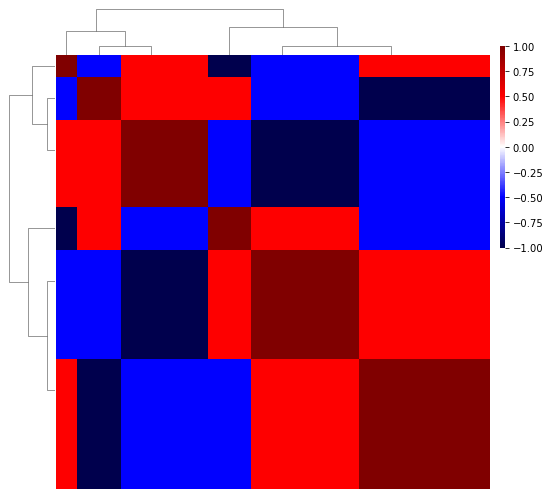

In [37]:
# Correlation between the TFs
corr_TFs = targets_shared_TFs.iloc[:, 1:].T.corr(method = "spearman")
plt.figure()
sns.clustermap(corr_TFs,
               method='average',
               metric='cosine',
               row_cluster=True, col_cluster=True,
               xticklabels=False, yticklabels=False,
               cmap='seismic', cbar_pos=(1, 0.5, 0.01, .4),
               dendrogram_ratio=(.1, .1),
               vmin = -1, vmax = 1, figsize=(7,7))
plt.savefig(fig_dir+'correlation_heatmap.png')
plt.show()

## Analyses of the clusters

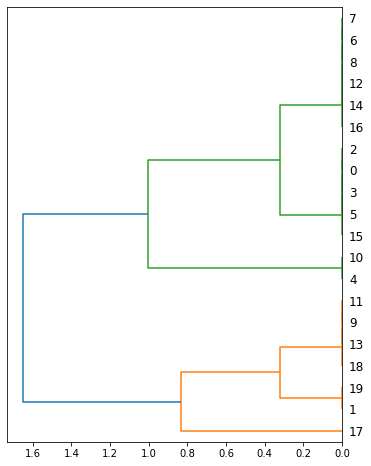

In [38]:
dend = linkage(corr_TFs, 
               method='average', metric='cosine')
plt.figure(figsize = (6, 8))
dendrogram(dend, orientation = "left", color_threshold = 1.2)
plt.savefig(fig_dir+'dendrogram.png')
plt.show()

In [39]:
TF_clusters = pd.DataFrame({'TF': corr_TFs.index, 
                            'cluster': fcluster(dend, 1.2, criterion = 'distance')})
cluster_counts = pd.DataFrame(TF_clusters['cluster'].value_counts()).reset_index()#.sort_values(by = 'index')
cluster_counts.columns = ['cluster', 'number_of_TFs']
cluster_counts

,cluster,number_of_TFs
0,2,13
1,1,7


In [40]:
targets_percent.reset_index(inplace=True)

### Plot trajectories

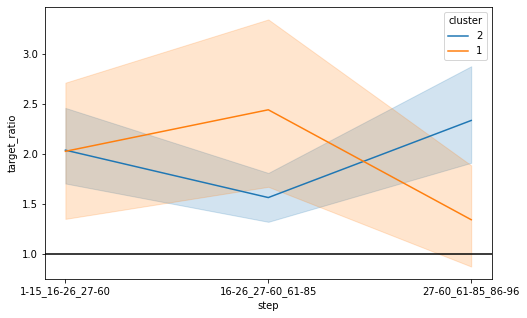

In [41]:
# plot trajectory of the number of targets in the clusters
targets_long = pd.melt(targets_percent, id_vars = ['index'],
       var_name='step', value_name = 'target_ratio')
targets_long.columns = ['TF', 'step', 'target_ratio']
targets_long = targets_long.merge(TF_clusters)
targets_long['cluster'] = targets_long['cluster'].astype(str)

plt.figure(figsize = (8, 5))
graph = sns.lineplot(data=targets_long,
             x='step', y='target_ratio',
             hue="cluster")
graph.axhline(1, color='black')
plt.savefig(fig_dir+'trajectories_cluster.png')
plt.show()

### Create network

In [42]:
# Create network
# Threshold correlation matrix
corr_TFs_0 = corr_TFs.copy()
corr_TFs_0[corr_TFs_0 < 0.6] = 0

corr_long = pd.melt(corr_TFs_0.reset_index(), id_vars='index')
corr_long = corr_long[(corr_long['value'] > 0) & (corr_long['index'] != corr_long['variable'])]
corr_long.columns = ['protein1', 'protein2', 'corr']
corr_long

network = nx.from_pandas_edgelist(corr_long, 'protein1', 'protein2', 'corr')
# add clusters as node attributes
clusters = {TF: TF_clusters.loc[TF_clusters['TF'] == TF, 'cluster'].tolist() for TF in list(network.nodes())}
nx.set_node_attributes(network, clusters, name='cluster')
oi.output_networkx_graph_as_interactive_html(network, filename=save_dir + "TF_corr_0.6.html")

PosixPath('/home/braunger/masterthesis/save/pcst/TF_corr_0.6.html')

In [43]:
# network image created from the interactive html file
#SVG(fig_dir+"net_DESeq_5%.svg")

In [44]:
# Create subnetworks for each cluster
pcst.create_subnet(1, corr_long, TF_clusters, data_dir, save_dir, 0.8)
pcst.create_subnet(2, corr_long, TF_clusters, data_dir, save_dir, 0.8)

## GSEA on targets of selected TFs

152


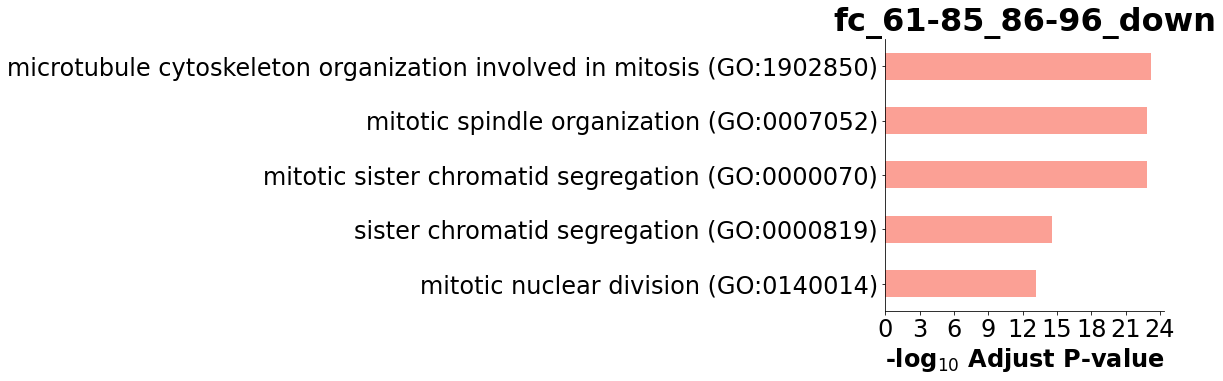

In [45]:
pcst.GSEA_DE_targets('fc_61-85_86-96', 'down', data_dir, de_dir)

In [46]:
names = gseapy.get_library_name() 
#names[:100]
# Aging_Perturbations_from_GEO_down, GTEx_Aging_Signatures_2021

# Intersections of the Steiner nodes

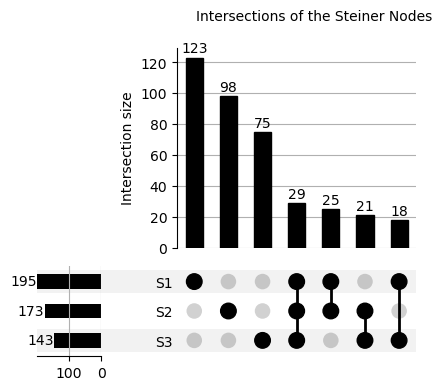

In [91]:
steiner_nodes = [[node[:-4] for node in net_stats_d2.iloc[net, 11]] for net in range(3)]

intersections = from_contents({'S3': steiner_nodes[2], 
                               'S2': steiner_nodes[1],
                               'S1': steiner_nodes[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 5, sort_categories_by=None).plot()
plt.figtext(0.45, 0.95, 'Intersections of the Steiner Nodes')
plt.savefig(fig_dir+'intersections_steiner_10%.png', dpi = 500, bbox_inches="tight")

In [48]:
# Steiner nodes included in all networks
shared_nodes = [node + '_tr0' for node in set.intersection(*map(set,steiner_nodes[:3]))]
degrees_steiner_nodes = pd.DataFrame(index = shared_nodes)

for name, net in net_dict.items():
    degrees = pd.DataFrame(net.degree(shared_nodes)).set_index(0)
    degrees.columns = [name.split("-")[2]]
    degrees_steiner_nodes = degrees_steiner_nodes.join(degrees)

shared_nodes = [node[:-4] for node in shared_nodes]
print(*shared_nodes, sep = ", ")

CYCS, POLR2B, ITGB1, TNFRSF1A, RANBP2, APP, SMAD4, HRAS, RACK1, EGFR, LRP6, TRAF6, AXIN1, WNT5A, TAB2, MFAP2, GNB1, DLG4, HSP90AA1, SHC1, CBL, RPS27A, TSG101, FYN, JAK2, HSPA5, TGFBR1, BCL2L1, TRADD


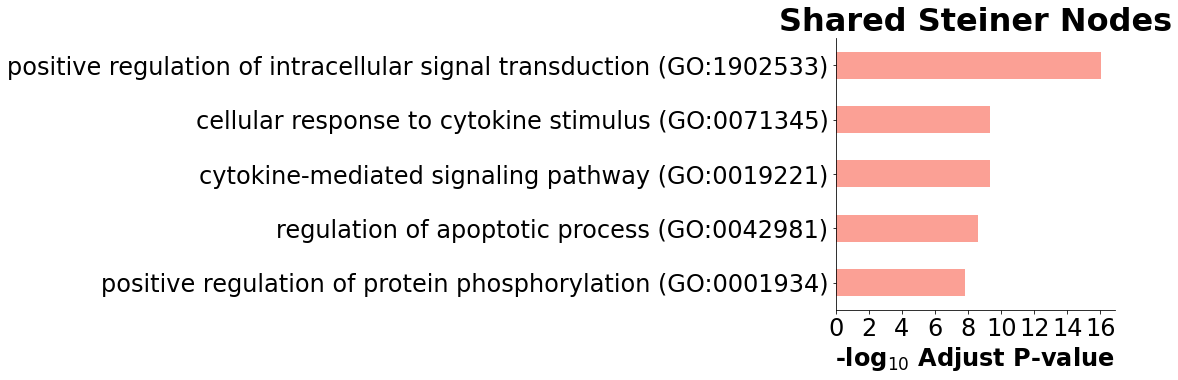

In [49]:
# GSEA on the shared Steiner nodes
enr = gseapy.enrichr(gene_list=shared_nodes, 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_steiner', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Shared Steiner Nodes',
        cutoff=0.01, top_term=5, figsize=(5, 5), color='salmon')

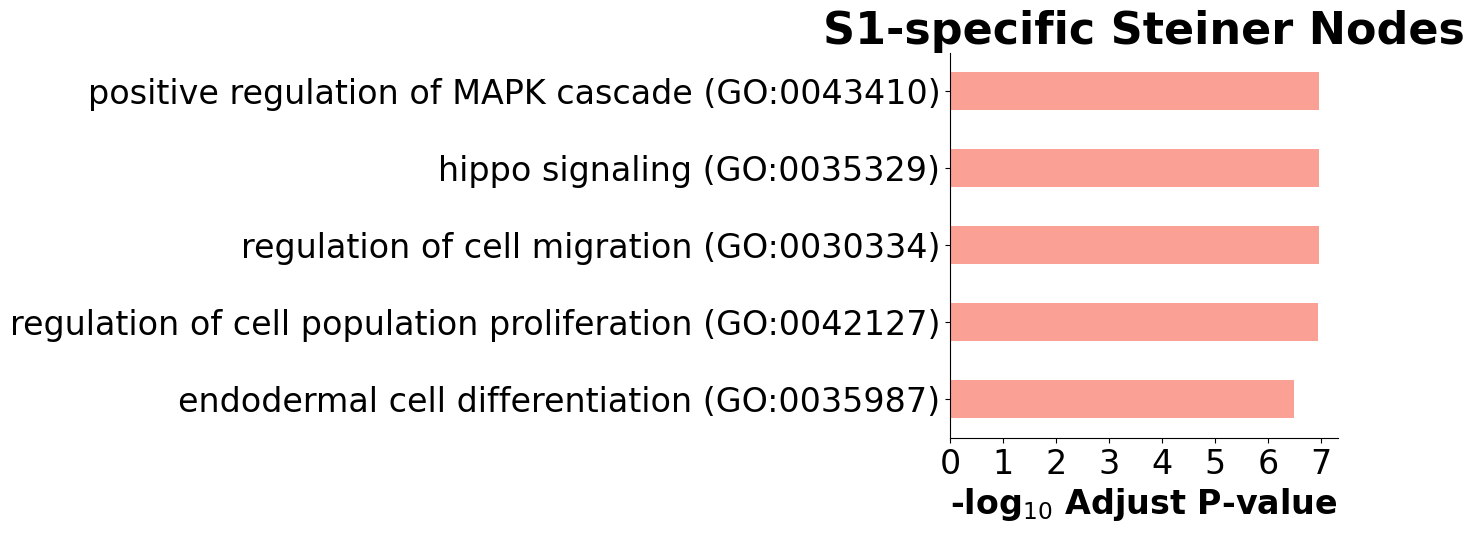

In [96]:
# GSEA on the Steiner nodes from the first network
first_nodes = list(set(steiner_nodes[0]).difference(set(steiner_nodes[1]).union(steiner_nodes[2])))

enr = gseapy.enrichr(gene_list=first_nodes, 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_steiner', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='S1-specific Steiner Nodes',
        cutoff=0.01, top_term=5, figsize=(5, 5), color='salmon')

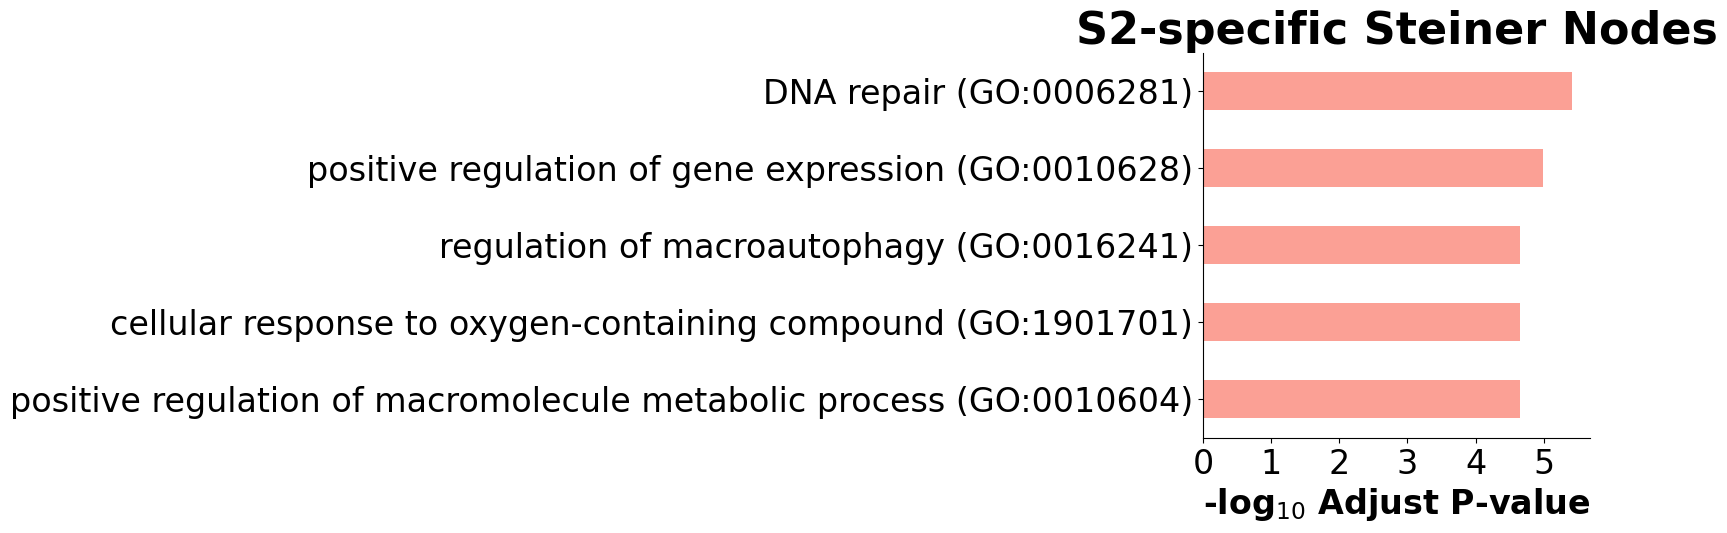

In [95]:
# GSEA on the Steiner nodes from the second network
second_nodes = list(set(steiner_nodes[1]).difference(set(steiner_nodes[0]).union(steiner_nodes[2])))

enr = gseapy.enrichr(gene_list=second_nodes, 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_steiner', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='S2-specific Steiner Nodes',
        cutoff=0.01, top_term=5, figsize=(5, 5), color='salmon')

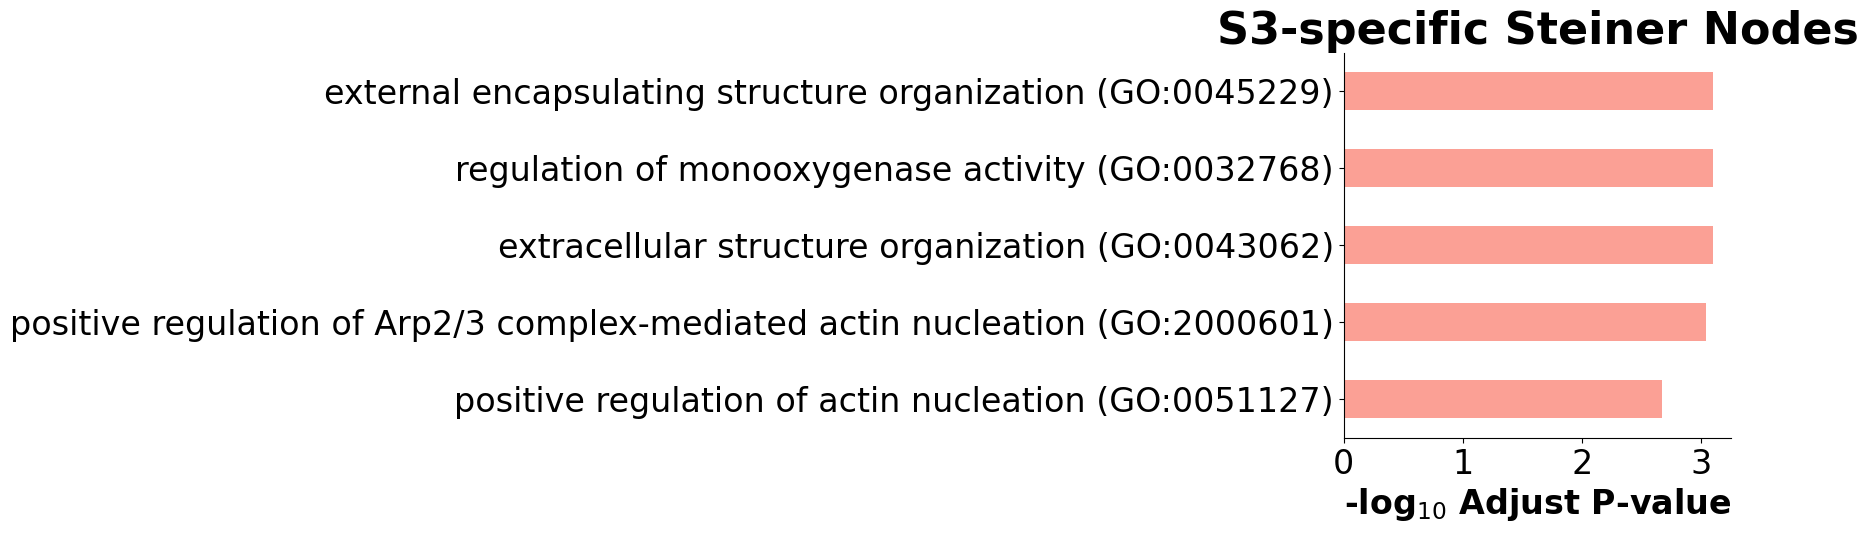

In [94]:
# GSEA on the Steiner nodes from the first network
last_nodes = list(set(steiner_nodes[2]).difference(set(steiner_nodes[1]).union(steiner_nodes[0])))

enr = gseapy.enrichr(gene_list=last_nodes, 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_steiner', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='S3-specific Steiner Nodes',
        cutoff=0.01, top_term=5, figsize=(5, 5), color='salmon')

# TF Ranking based on the number of DE targets

## Top 10 TFs per network 

In [53]:
# Ranking all TFs according to the number of targets in each network
TFs_ranking = pd.DataFrame(columns = ['TF', 'targets', 'rank', 'life_stage'])

for name, df in target_counts_d2.items():
    df = df[df.index.isin(shared_TFs)]
    df = df.sort_values(by = 'protein1_incl_targets', ascending = False)
    TFs_ranking_net = pd.DataFrame({'TF': df.index.tolist(), 
                            'targets': df.iloc[:, 0],
                            'rank': range(1, df.shape[0]+1, 1), 
                            'life_stage': name})
    TFs_ranking = pd.concat([TFs_ranking, TFs_ranking_net])

TFs_ranking = TFs_ranking.reset_index(drop = True)
TFs_ranking.head()

TFs_ranking_top10 = TFs_ranking[TFs_ranking['rank'] < 21]

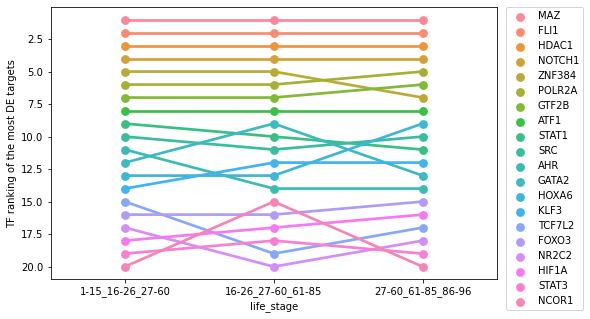

In [54]:
plt.figure(figsize = (8, 5))
sns.pointplot(data = TFs_ranking_top10, x = 'life_stage', y = 'rank', hue = 'TF')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim(reversed(plt.ylim()))
plt.ylabel('TF ranking of the most DE targets')
plt.show()

In [55]:
TF_occurences = TFs_ranking_top10.groupby('TF')['life_stage'].apply(list).reset_index()
TF_occurences['n'] = [len(stages) for stages in TF_occurences['life_stage'].tolist()]

ranks = TFs_ranking.groupby('TF')['rank'].agg(['mean', 'min', 'max', 'var']).reset_index()
TF_occurences = TF_occurences.merge(ranks).sort_values(by = 'var', ascending = False).sort_values(by = 'var', ascending = False)

TF_occurences

,TF,life_stage,n,mean,min,max,var
11,NCOR1,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,18.333333,15,20,8.333333
8,HOXA6,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,11.666667,9,13,5.333333
4,GATA2,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,11.333333,9,13,4.333333
18,TCF7L2,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,17.000000,15,19,4.000000
0,AHR,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,13.000000,11,14,3.000000
13,NR2C2,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,18.333333,17,20,2.333333
9,KLF3,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,12.666667,12,14,1.333333
19,ZNF384,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,5.666667,5,7,1.333333
7,HIF1A,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,17.000000,16,18,1.000000
16,STAT1,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,10.000000,9,11,1.000000


## TFs with greatest differences in the ranking

In [56]:
ranks['range'] = ranks['max'] - ranks['min']
ranks = ranks.sort_values(by = 'range', ascending = False)
top_TFs = ranks.iloc[0:10, 0].tolist()
ranks.head(n=10)

,TF,mean,min,max,var,range
11,NCOR1,18.333333,15,20,8.333333,5
8,HOXA6,11.666667,9,13,5.333333,4
18,TCF7L2,17.000000,15,19,4.000000,4
4,GATA2,11.333333,9,13,4.333333,4
0,AHR,13.000000,11,14,3.000000,3
13,NR2C2,18.333333,17,20,2.333333,3
16,STAT1,10.000000,9,11,1.000000,2
9,KLF3,12.666667,12,14,1.333333,2
19,ZNF384,5.666667,5,7,1.333333,2
7,HIF1A,17.000000,16,18,1.000000,2


<Figure size 432x288 with 0 Axes>

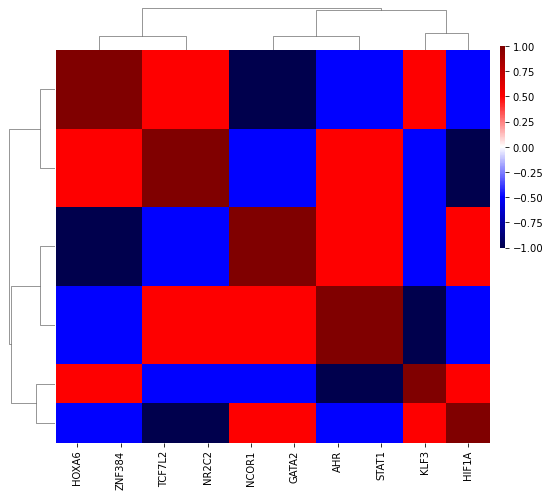

In [57]:
# Correlation heatmap
plt.figure()
sns.clustermap(corr_TFs.loc[top_TFs, top_TFs],
               method='average',
               metric='cosine',
               row_cluster=True, col_cluster=True,
               xticklabels=True, yticklabels=False,
               cmap='seismic', cbar_pos=(1, 0.5, 0.01, .4),
               dendrogram_ratio=(.1, .1),
               vmin = -1, vmax = 1, figsize=(7,7))
plt.savefig(fig_dir+'correlation_heatmap_rankingTFs.png')
plt.show()

In [58]:
# Network
tf_targets = pd.read_csv(data_dir + 'tf_data/tf-target-information.txt', sep = '\t')
tf_targets = tf_targets[['TF', 'target']].drop_duplicates()
tf_targets_sub = tf_targets[tf_targets['TF'].isin(top_TFs)]

corr_TFs_0 = corr_TFs.copy()
corr_TFs_0[corr_TFs_0 < 0.4] = 0

corr_long = pd.melt(corr_TFs_0.reset_index(), id_vars='index')
corr_long = corr_long[(corr_long['value'] > 0) & (corr_long['index'] != corr_long['variable'])]
corr_long.columns = ['protein1', 'protein2', 'corr']

corr_selected = corr_long.loc[corr_long['protein1'].isin(top_TFs), :]
corr_selected = corr_selected.loc[corr_selected['protein2'].isin(top_TFs), :]
corr_selected['shared_targets'] = corr_selected.apply(lambda row : len(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein1'], 'target']).intersection(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein2'], 'target']))), axis = 1)
corr_selected['targets_protein1'] = corr_selected.apply(lambda row : len(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein1'], 'target'])), axis = 1)
corr_selected['targets_protein2'] = corr_selected.apply(lambda row : len(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein2'], 'target'])), axis = 1)
corr_selected['percent_shared_targets'] = corr_selected['shared_targets']/corr_selected[['targets_protein1', 'targets_protein2']].min(axis=1)

# Add additional row such that the coloring is not inverted
df = {'protein1': 'SRC', 'protein2': 'SRC', 'corr': 1, 'shared_targets': 0, 'targets_protein1': 0, 'targets_protein2':0, 'percent_shared_targets':0}
corr_selected = corr_selected.append(df, ignore_index = True)

network = nx.from_pandas_edgelist(corr_selected, 'protein1', 'protein2', ['corr', 'shared_targets', 'percent_shared_targets'])
oi.output_networkx_graph_as_interactive_html(network, filename=save_dir + 'TFs_ranking.html')

PosixPath('/home/braunger/masterthesis/save/pcst/TFs_ranking.html')

# Neighborhood networks for design 2

## Shared TFs

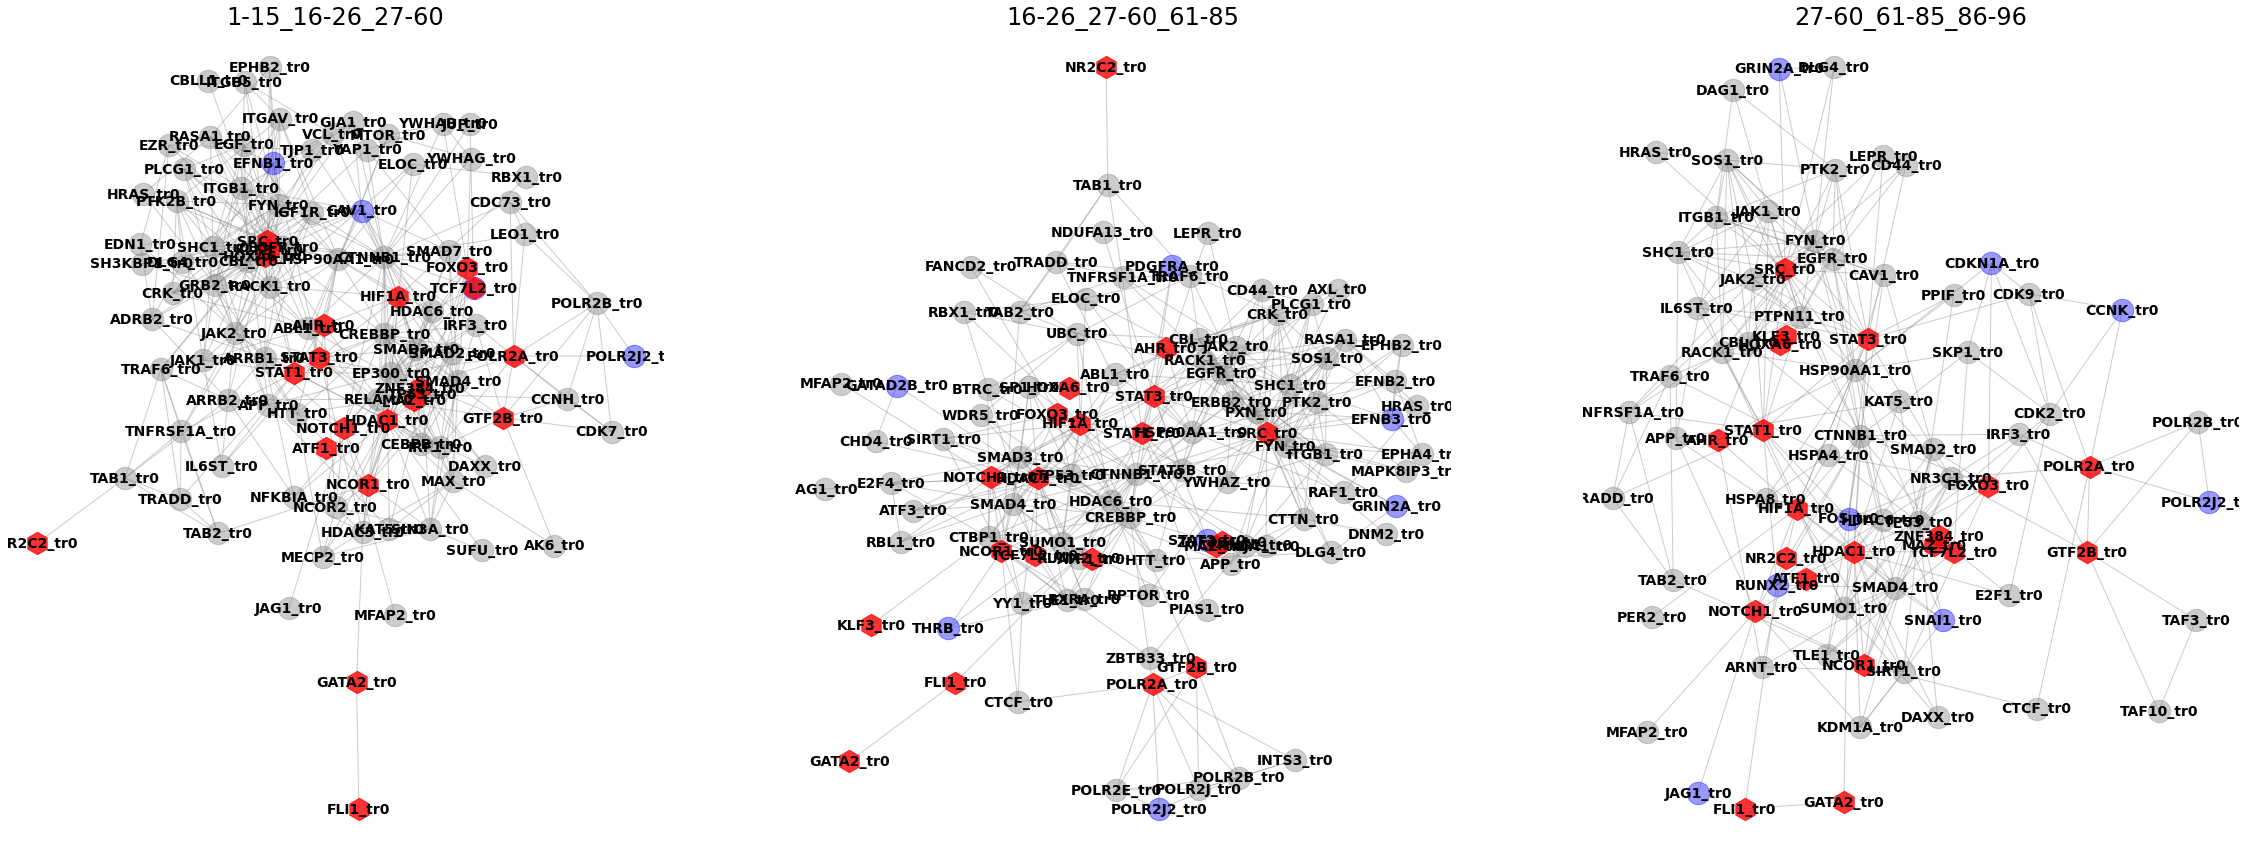

<Figure size 432x288 with 0 Axes>

In [59]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)
TFs = shared_TFs_design2

nbh.plot_neighborhood_all_networks(TFs,
                                 net_dict,
                                 cthreshold = 0.3, 
                                 nodesize = 500,
                                 save=False)
plt.savefig(fig_dir+'nets_shared_TFs.png')

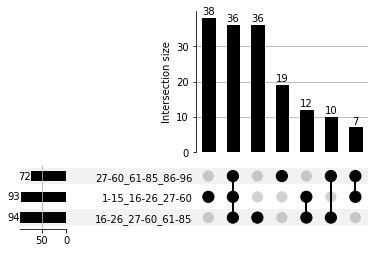

In [60]:
# How strongly do these neighborhoods overlap?
neighborhood_dict = nbh.get_neighborhood_intersections(TFs, net_dict, cthreshold = 0.3)
plt.savefig(fig_dir+'intersection_neighborhood_sharedTFs.png')

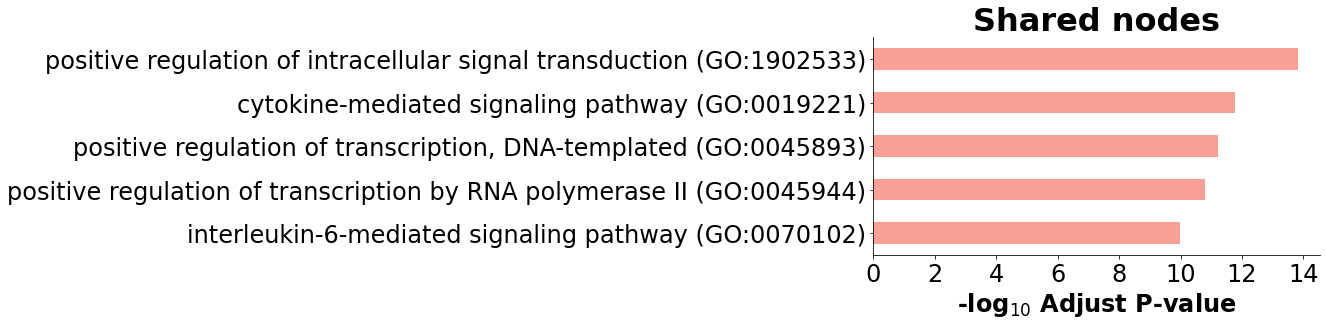

In [61]:
# GSEA for shared neighborhood nodes
shared_nodes = set(neighborhood_dict['1-15_16-26_27-60']).intersection(set(neighborhood_dict['16-26_27-60_61-85']), set(neighborhood_dict['27-60_61-85_86-96']))
enr = gseapy.enrichr(gene_list=list(shared_nodes), 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_neighbors', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Shared nodes',
        cutoff=0.01, top_term=5, figsize=(8, 4), color='salmon')

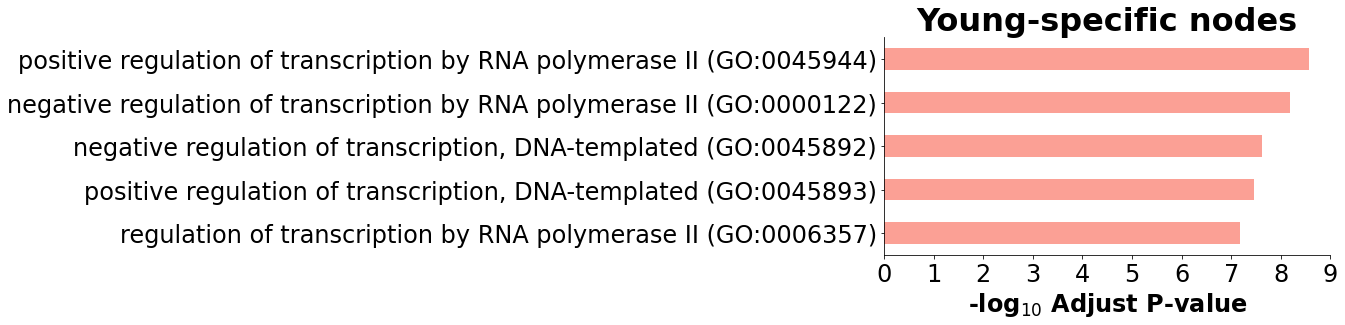

In [62]:
# GSEA for young-specific neighborhood nodes
young_nodes = set(neighborhood_dict['1-15_16-26_27-60']).difference(set(neighborhood_dict['16-26_27-60_61-85']).union(set(neighborhood_dict['27-60_61-85_86-96'])))

enr = gseapy.enrichr(gene_list=list(young_nodes), 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_neighbors', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Young-specific nodes',
        cutoff=0.01, top_term=5, figsize=(8, 4), color='salmon')

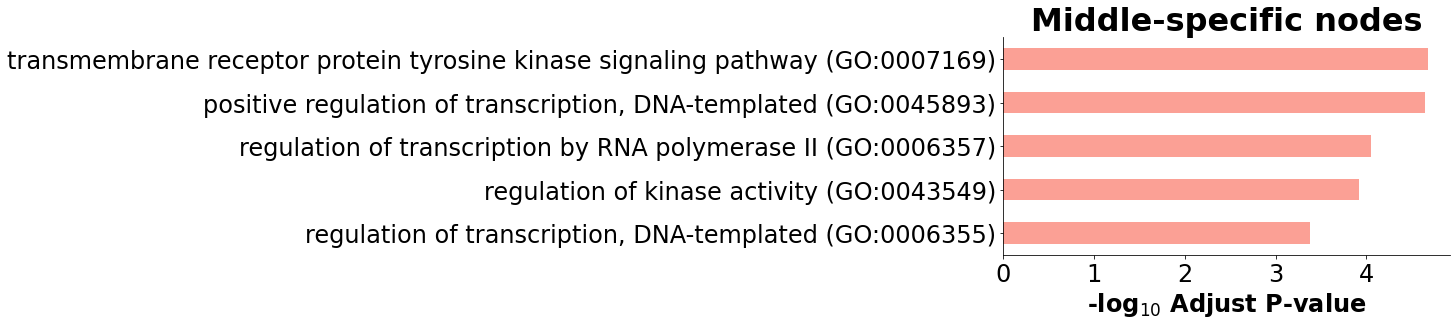

In [63]:
# GSEA for middle-specific neighborhood nodes
middle_nodes = set(neighborhood_dict['16-26_27-60_61-85']).difference(set(neighborhood_dict['1-15_16-26_27-60']).union(set(neighborhood_dict['27-60_61-85_86-96'])))

enr = gseapy.enrichr(gene_list=list(middle_nodes), 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_neighbors', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Middle-specific nodes',
        cutoff=0.01, top_term=5, figsize=(8, 4), color='salmon')

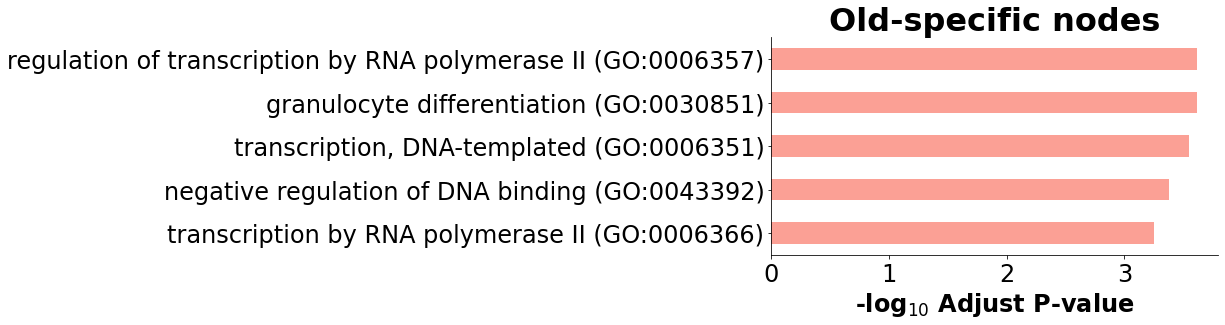

In [64]:
# GSEA for old-specific neighborhood nodes
old_nodes = set(neighborhood_dict['27-60_61-85_86-96']).difference(set(neighborhood_dict['1-15_16-26_27-60']).union(set(neighborhood_dict['16-26_27-60_61-85'])))

enr = gseapy.enrichr(gene_list=list(old_nodes), 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_neighbors', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Old-specific nodes',
        cutoff=0.01, top_term=5, figsize=(8, 4), color='salmon')

## Young-specific TFs

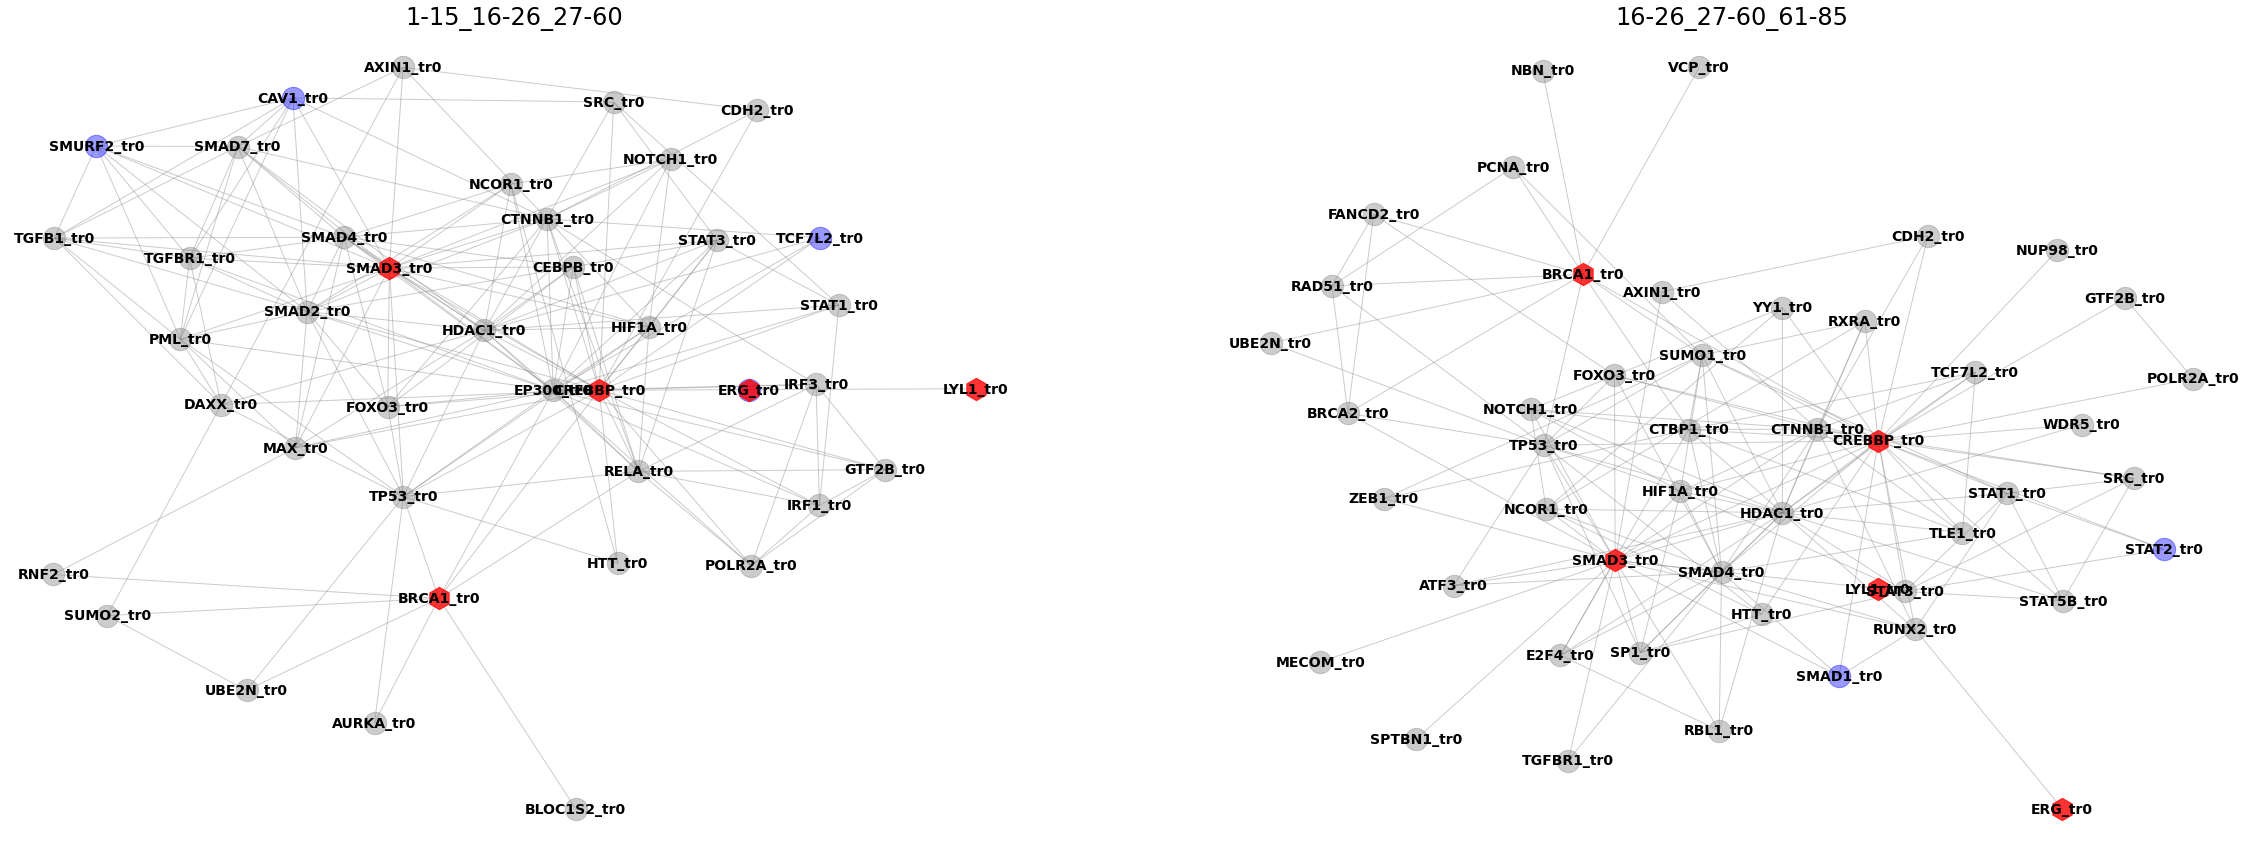

<Figure size 432x288 with 0 Axes>

In [65]:
TFs = young_specific_TFs(incl_TFs_2)
net_dict.pop('200.allTFs.27-60_61-85_86-96', None)
nbh.plot_neighborhood_all_networks(TFs,
                                 net_dict,
                                 cthreshold = 0.3, 
                                 nodesize = 500,
                                 save=False)
plt.savefig(fig_dir+'nets_young_TFs.png')

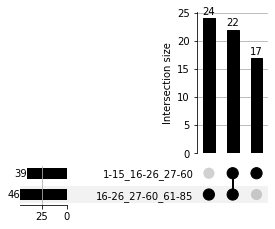

In [66]:
# How strongly do these neighborhoods overlap?
nbh.get_neighborhood_intersections(TFs, net_dict, cthreshold = 0.3)
plt.savefig(fig_dir+'intersection_neighborhood_youngTFs.png')

## Old-specific TFs

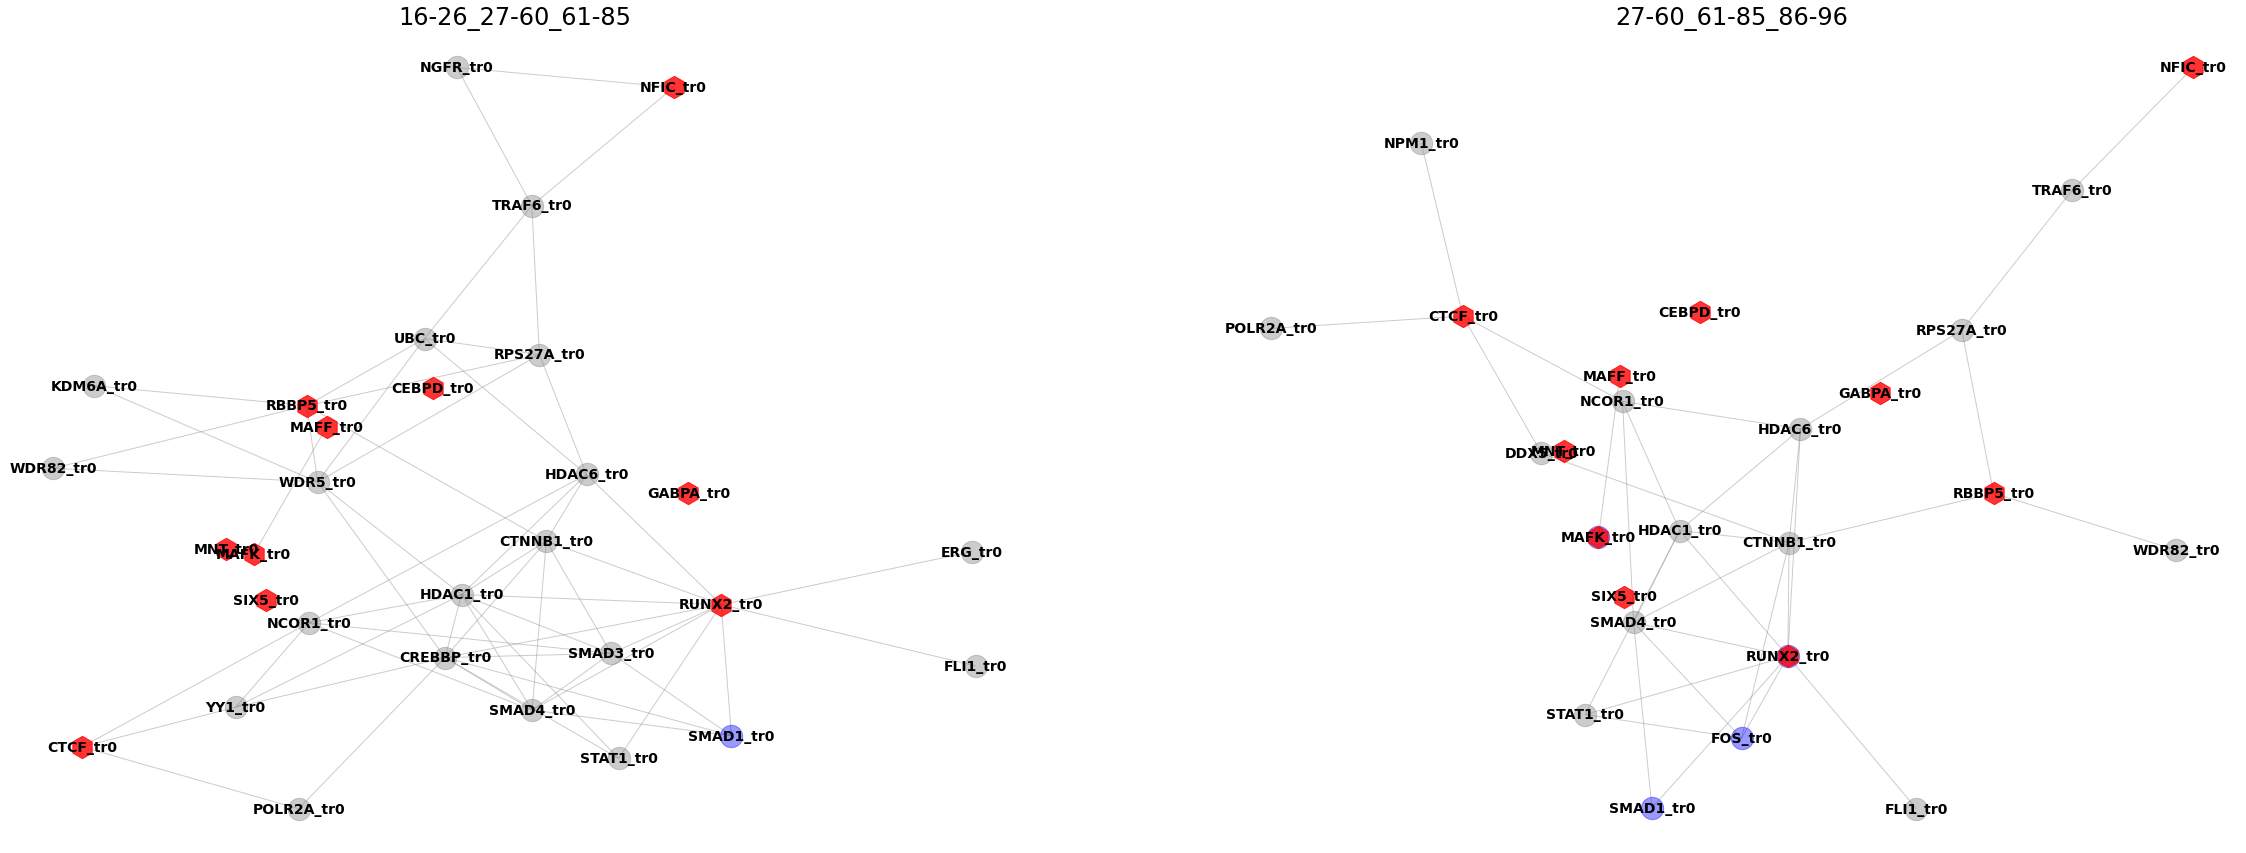

<Figure size 432x288 with 0 Axes>

In [67]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)
net_dict.pop('200.allTFs.1-15_16-26_27-60', None)
TFs = old_specific_TFs(incl_TFs_2)

nbh.plot_neighborhood_all_networks(TFs,
                                 net_dict,
                                 cthreshold = 0.3, 
                                 nodesize = 500,
                                 save=False)
plt.savefig(fig_dir+'nets_old_TFs.png')

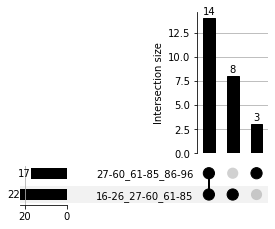

In [68]:
# How strongly do these neighborhoods overlap?
nbh.get_neighborhood_intersections(TFs, net_dict, cthreshold = 0.3)
plt.savefig(fig_dir+'intersection_neighborhood_oldTFs.png')

# Distances inside and between TF groups

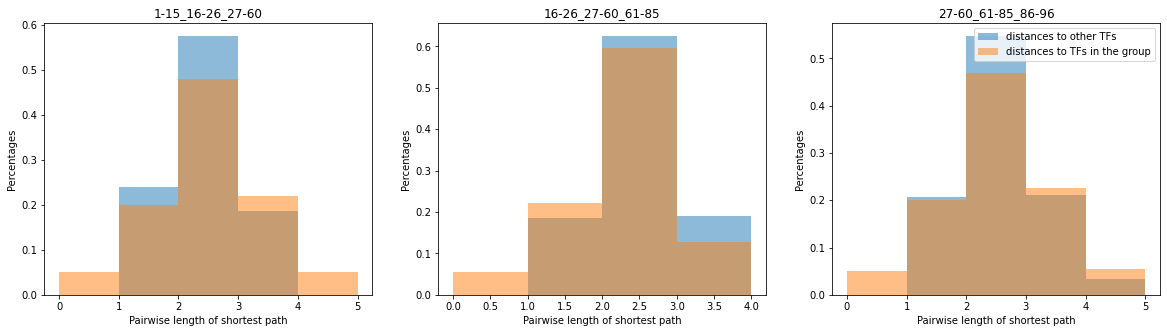

In [69]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
binwidth = 1   
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)

for (name, net), ax in zip(net_dict.items(), axs.ravel()):
    # Filter network to the nodes on the left
    right_side = [node for node in list(net.nodes()) if node.endswith('_tr1')]
    net.remove_nodes_from(right_side)

    TFs = [TF + '_tr0' for TF in shared_TFs_design2]
    all_TFs = [TF + '_tr0' for TF_list in incl_TFs_2 for TF in TF_list]

    group_distances = []
    other_distances = []

    for node_dict in nx.all_pairs_shortest_path_length(net):
        if node_dict[0] not in TFs:
            continue

        for key, value in node_dict[1].items():
            if key in TFs: 
                group_distances.append(value)
            elif key in all_TFs:
                other_distances.append(value)
 
    ax.hist(other_distances, weights=np.ones_like(other_distances) / len(other_distances),
             bins=np.arange(min(other_distances), max(other_distances) + binwidth, binwidth), 
             alpha=0.5, label="distances to other TFs")
    ax.hist(group_distances, weights=np.ones_like(group_distances) / len(group_distances),
             bins=np.arange(min(group_distances), max(group_distances) + binwidth, binwidth), 
             alpha=0.5, label="distances to TFs in the group")
    ax.set_xlabel("Pairwise length of shortest path")
    ax.set_ylabel("Percentages")
    plt.legend(loc='upper right')
    ax.set_title(name.split(".")[2])
    
plt.show()

## TF centrality

In [70]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)
all_TFs = [TF + '_tr0' for TF_list in incl_TFs_2 for TF in TF_list]

TFs_ranking = pd.DataFrame(columns = ['TF', 'betweenness', 'rank', 'life_stage'])

for name, net in net_dict.items():
    name = name.split(".")[2]
    net_df = oi.get_networkx_graph_as_dataframe_of_nodes(net)
    net_df = net_df[net_df.index.isin([TF + '_tr0' for TF in shared_TFs])]
    net_df = net_df.sort_values(by = 'betweenness', ascending = False)
    TFs_ranking_net = pd.DataFrame({'TF': [TF[:-4] for TF in net_df.index.tolist()], 
                            'betweenness': net_df['betweenness'],
                            'rank': range(1, net_df.shape[0]+1, 1), 
                            'life_stage': name})
    TFs_ranking = pd.concat([TFs_ranking, TFs_ranking_net])

TFs_ranking = TFs_ranking.reset_index(drop = True)

TFs_ranking.head()

,TF,betweenness,rank,life_stage
0,HDAC1,0.089331,1,1-15_16-26_27-60
1,NOTCH1,0.043527,2,1-15_16-26_27-60
2,SRC,0.037463,3,1-15_16-26_27-60
3,MAZ,0.033790,4,1-15_16-26_27-60
4,FLI1,0.020621,5,1-15_16-26_27-60


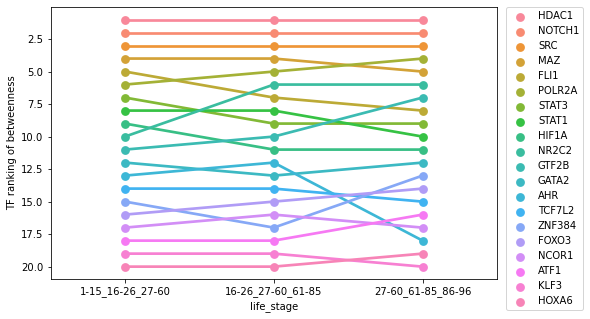

In [71]:
plt.figure(figsize = (8, 5))
sns.pointplot(data = TFs_ranking, x = 'life_stage', y = 'rank', hue = 'TF')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim(reversed(plt.ylim()))
plt.ylabel('TF ranking of betweenness')
plt.show()

In [72]:
ranks = TFs_ranking.groupby('TF')['rank'].agg(['mean', 'min', 'max', 'var']).reset_index()
ranks['range'] = ranks['max'] - ranks['min']
ranks = ranks.sort_values(by = 'range', ascending = False)
ranks.head(n=7)

,TF,mean,min,max,var,range
0,AHR,14.333333,12,18,10.333333,6
5,GTF2B,9.333333,7,11,4.333333,4
13,NR2C2,7.333333,6,10,5.333333,4
19,ZNF384,15.000000,13,17,4.000000,4
2,FLI1,6.666667,5,8,2.333333,3
3,FOXO3,15.000000,14,16,1.000000,2
7,HIF1A,10.333333,9,11,1.333333,2


In [73]:
# per TF get number of PPI edges and TF-target edges and Katz centrality
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)
all_TFs = [TF + '_tr0' for TF_list in incl_TFs_2 for TF in TF_list]

# load all TF targets
all_tf_targets = pd.read_csv(tf_dir+'TF_targets_anno.csv')
all_genes = pd.read_csv(de_dir+'all_genes.csv')
all_tf_targets = all_tf_targets[all_tf_targets['target'].isin(all_genes['gene'])]

TFs_centrality = pd.DataFrame(columns = ['TF', 'net', 'katz_centrality', 'PPIs', 'DE_targets', 'all_targets'])
count = 0

for name, net in net_dict.items():
    # calculate Katz centrality for each node in the network
    # largest eigenvalue phi
    phi = np.max(np.abs(np.linalg.eigh(np.array(nx.adjacency_matrix(net).todense()))[0]))
    centrality = nx.katz_centrality(net, alpha=1/phi-0.01)
    for TF in incl_TFs_2[count]:
        life_stage = name.split(".")[2]
        neighbors = [n[-1] for n in net.neighbors(TF + '_tr0')]
        n_targets = all_tf_targets[all_tf_targets['TF'] == TF].shape[0]
        row = pd.DataFrame({'TF': [TF], 'net': [life_stage], 
                            'katz_centrality': centrality[TF+ '_tr0'],
                            'PPIs': [neighbors.count('0')], 
                            'DE_targets': [neighbors.count('1')], 
                            'all_targets': [n_targets]})
        TFs_centrality = pd.concat([TFs_centrality, row], ignore_index = True)
    count = count + 1
TFs_centrality = TFs_centrality.replace(['1-15_16-26_27-60', '16-26_27-60_61-85', '27-60_61-85_86-96'], 
                                       ['young', 'middle', 'old'])
TFs_centrality.to_csv(save_dir + 'TFs_centrality.csv', index = False)
TFs_centrality.head()

,TF,net,katz_centrality,PPIs,DE_targets,all_targets
0,MYBL2,young,0.037614,15,1,246
1,POU2F2,young,0.036934,6,15,573
2,BRCA1,young,0.073438,39,27,2371
3,SRC,young,0.101516,95,20,1185
4,TEAD4,young,0.054166,18,26,1377


In [ ]:
all_genes = pd.read_csv(de_dir+'all_genes.csv')
all_genes.head

## Hypergeometric test to identify TFs targeting significantly more DE genes

In [219]:
# Hypergeometric confidence interval for one network
network = "old"

if network == "young": 
    transition = "fc_16-26_27-60"
elif network == "middle":
    transition = "fc_27-60_61-85"
elif network == "old": 
    transition = "fc_61-85_86-96"

# Calculate percentage of all genes and DE genes targeted by each TF
TF_percent_targets = TFs_centrality[TFs_centrality['net'] == network]
TF_percent_targets['prop_genome_targets'] = TF_percent_targets['all_targets'] / all_genes.shape[0]
TF_percent_targets['prop_DE_targets'] = TF_percent_targets['DE_targets'] / DE_genes.shape[0]
TF_percent_targets = TF_percent_targets.set_index('TF')

# Hypergeometric parameters N and K
N = all_genes.shape[0] # total number of genes
DE_genes = pd.read_csv(data_dir+'de_data/DE_var_p_n_200.csv')
DE_genes = DE_genes[DE_genes['transition'] == transition]
K = DE_genes.shape[0] # total number of DE genes

# Sequence of hyper geometric parameter n
q_list = np.logspace(-4,0,1000)
n_list = [int(q*N) for q in q_list]

# Lower and upper bound of (right-sided) CI
alpha = 0.05/TF_percent_targets.shape[0] # level of confidence interval
ci_lowerbound = np.repeat(0, len(q_list))
ci_upperbound = np.array([ss.hypergeom.ppf(1-alpha, N, K, n, loc=0) for n in n_list])/K

/home/braunger/miniconda3/envs/pcst/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/braunger/miniconda3/envs/pcst/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


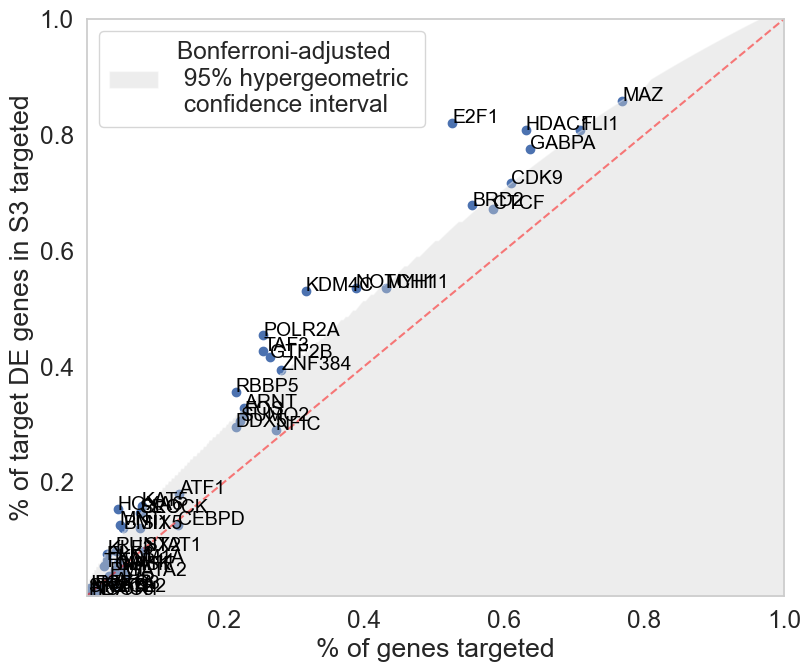

In [220]:
# Plot TFs on prop_genome_targets - prop_DE_targets space for one network
sns.set(font_scale=1.6)
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(9,7.5))
x = TF_percent_targets['prop_genome_targets']
y = TF_percent_targets['prop_DE_targets']
labels = TF_percent_targets.index.values
ax.scatter(x, y)
ax.plot((0,1),(0,1), color='red', linestyle='dashed', alpha=0.5)
ax.fill_between(q_list, ci_lowerbound, ci_upperbound, where=None, facecolor='lightgrey', 
                interpolate=False, alpha=0.4, 
                label='Bonferroni-adjusted \n 95% hypergeometric \n confidence interval')
for i in range(TF_percent_targets.shape[0]):
    ax.annotate(labels[i], (x[i], y[i]), size=14, color='black')
plt.xlabel('% of genes targeted')
plt.ylabel('% of target DE genes in S3 targeted')
plt.legend(loc='upper left')
plt.xlim([4e-3,1])
plt.ylim([3e-3,1])
plt.savefig(fig_dir+'hypergeom_old_TFs.png', dpi = 500, bbox_inches="tight")
plt.show()

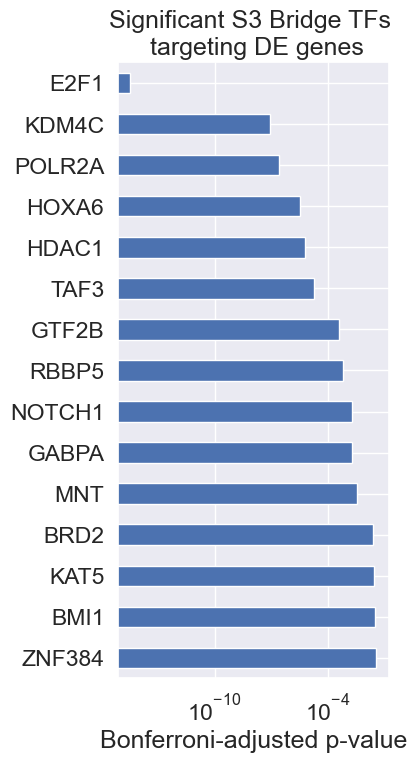

Number of significant TFs = 15


In [222]:
# Compute adjusted p-values
pvals = [ss.hypergeom.sf(TF_percent_targets.loc[tf,'prop_DE_targets']*K - 1, 
                         N, 
                         K, 
                         TF_percent_targets.loc[tf,'prop_genome_targets']*N)*TF_percent_targets.shape[0]
         for tf in TF_percent_targets.index]
TF_p_values = pd.concat(
    [TF_percent_targets, pd.DataFrame({'adj_pval': pvals}, index=TF_percent_targets.index)], 
    axis=1
)
TF_p_values['adj_pval'] = TF_p_values['adj_pval'].fillna(1)

# Barplot of significant TFs
TF_p_values = TF_p_values.sort_values(by='adj_pval', ascending=False)

sns.set(font_scale=1.5)
plt.figure(figsize=(3.5,8))
TF_p_values[TF_p_values['adj_pval']<0.05]['adj_pval'].plot.barh()
plt.xscale('log')
plt.xlabel('Bonferroni-adjusted p-value')
plt.ylabel('')
plt.title('Significant S3 Bridge TFs \n targeting DE genes')
plt.savefig(fig_dir+'signif_old_TFs.png', dpi = 500, bbox_inches="tight")
plt.show()

significant_tfs = TF_p_values[TF_p_values['adj_pval']<0.05].index.values
print(f'Number of significant TFs = {len(significant_tfs)}')

# Save df containing the adjusted p-values
TF_p_values['TF'] = TF_p_values.index.values
TF_p_values.to_csv(save_dir + 'TFs_centrality_' + network + '.csv', index = False)